In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Load an RGB image
    image = cv2.imread('E:\Msarat\project optimization\images.jpg')
    if image is None:
        print("Error: Could not load the image. Please check the file path.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale for processing
    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

    # 1. Contrast Stretching
    min_val = np.min(gray_image)
    max_val = np.max(gray_image)
    contrast_stretched = np.uint8(255 * ((gray_image - min_val) / (max_val - min_val)))

    # 2. Histogram Equalization
    hist_equalized = cv2.equalizeHist(gray_image)

    # 3. Thresholding (using Otsu's method)
    _, thresholded = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Calculate histograms
    hist_original = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    hist_stretched = cv2.calcHist([contrast_stretched], [0], None, [256], [0, 256])
    hist_equalized_hist = cv2.calcHist([hist_equalized], [0], None, [256], [0, 256])
    hist_thresholded = cv2.calcHist([thresholded], [0], None, [256], [0, 256])

    # Display results
    plt.figure(figsize=(20, 15))

    # Display Images
    plt.subplot(2, 4, 1)
    plt.title('Original Image')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.title('Contrast Stretching')
    plt.imshow(contrast_stretched, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.title('Histogram Equalization')
    plt.imshow(hist_equalized, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.title('Thresholding')
    plt.imshow(thresholded, cmap='gray')
    plt.axis('off')

    # Display Histograms
    plt.subplot(2, 4, 5)
    plt.title('Original Histogram')
    plt.plot(hist_original)
    plt.xlim([0, 256])
    plt.grid(True)

    plt.subplot(2, 4, 6)
    plt.title('Contrast Stretched Histogram')
    plt.plot(hist_stretched)
    plt.xlim([0, 256])
    plt.grid(True)

    plt.subplot(2, 4, 7)
    plt.title('Equalized Histogram')
    plt.plot(hist_equalized_hist)
    plt.xlim([0, 256])
    plt.grid(True)

    plt.subplot(2, 4, 8)
    plt.title('Thresholded Histogram')
    plt.plot(hist_thresholded)
    plt.xlim([0, 256])
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('result.png')
    plt.show()

if __name__ == "__main__":
    main()

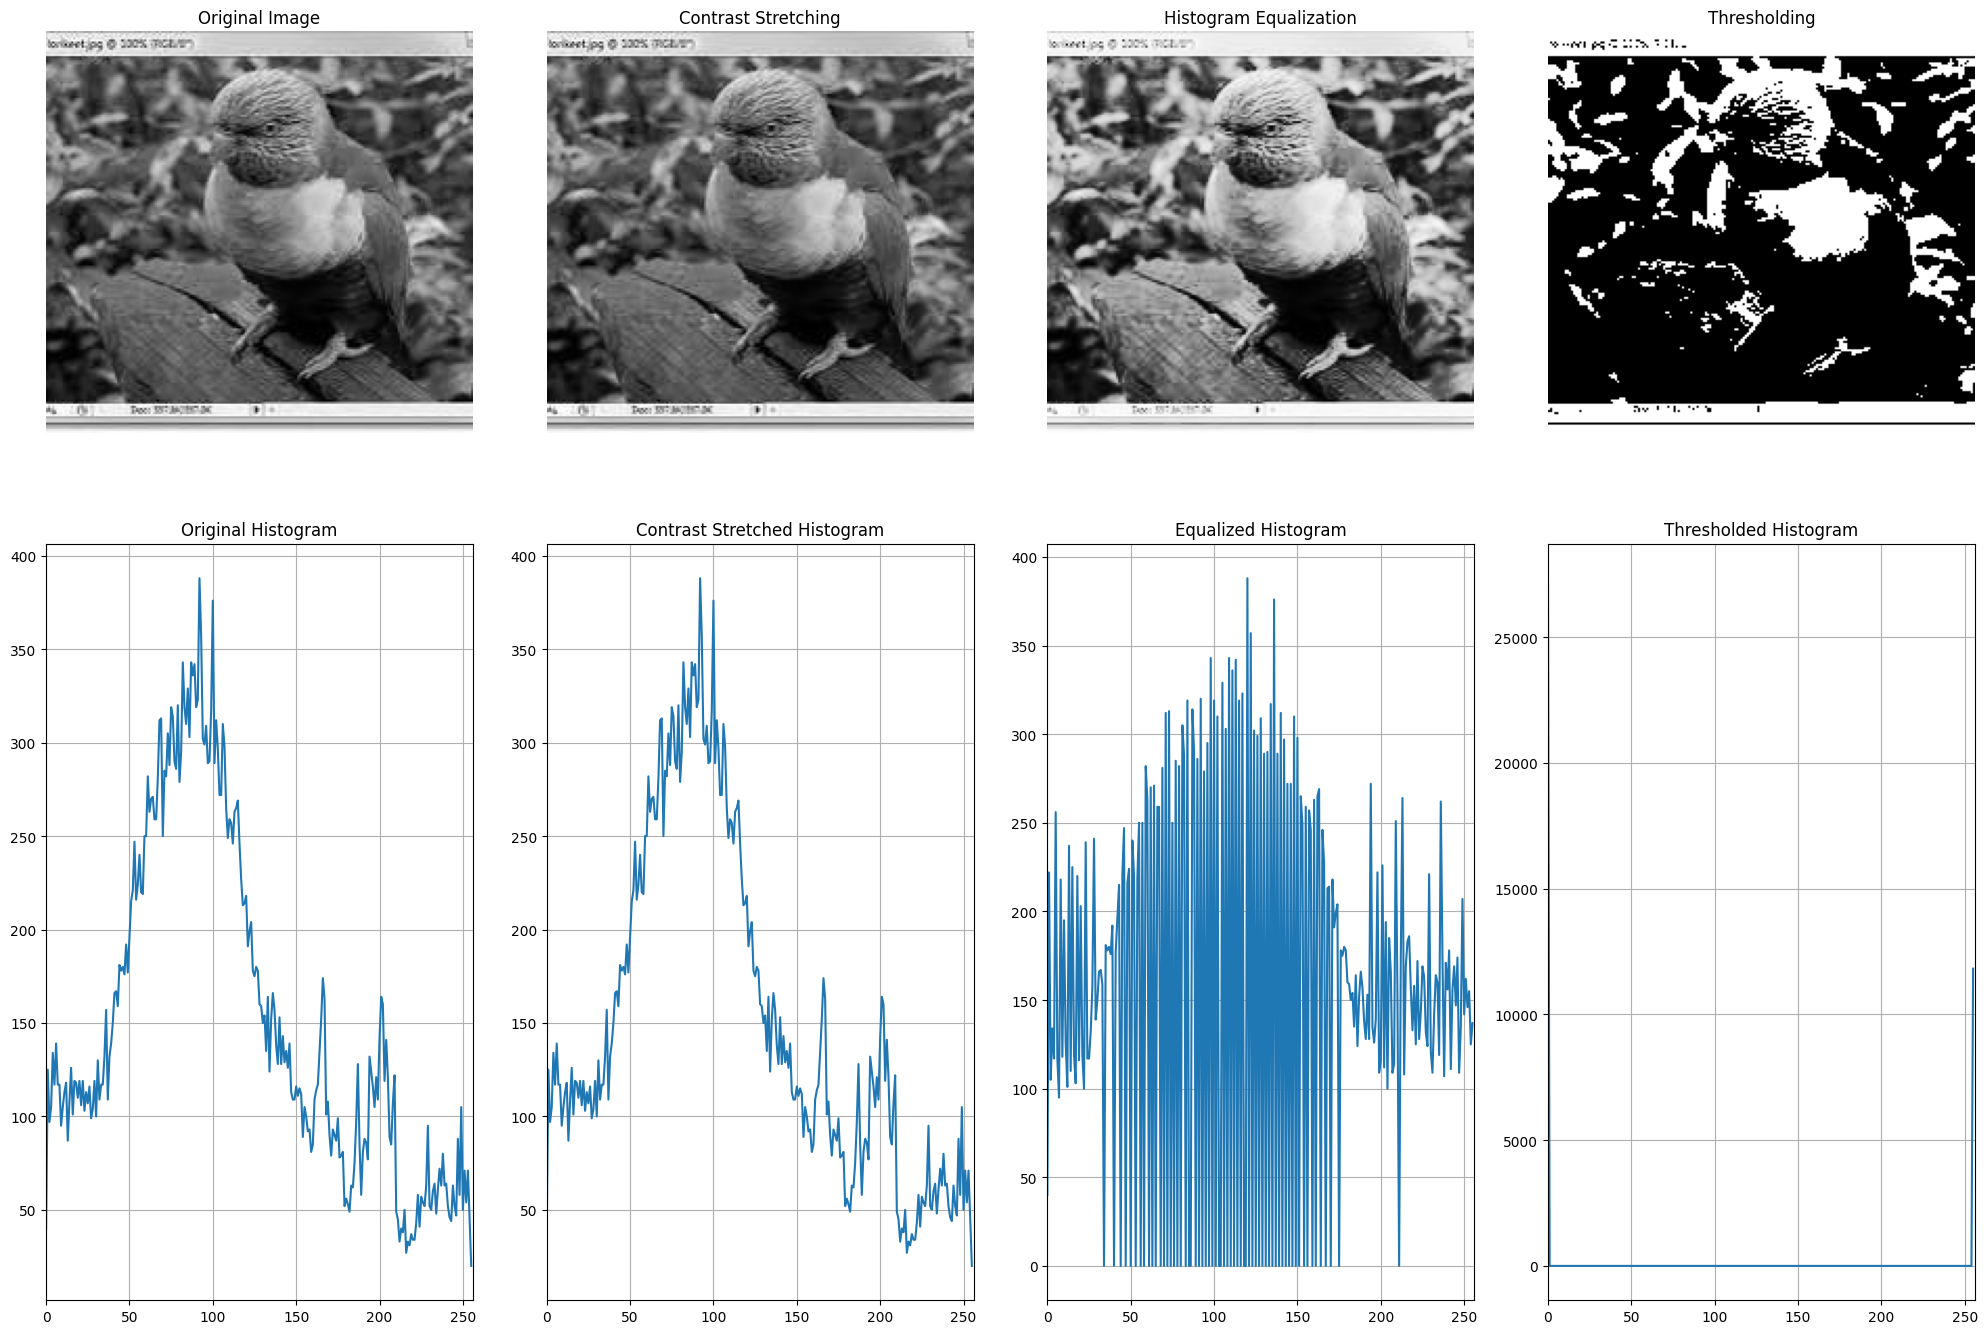